In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Genre=df['Genre']
df['Genre']=pd.get_dummies(Genre,drop_first=True)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
x=df.iloc[:,[2,3,4]].values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=5)
ypred=kmeans.fit_predict(x)

In [8]:
ypred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

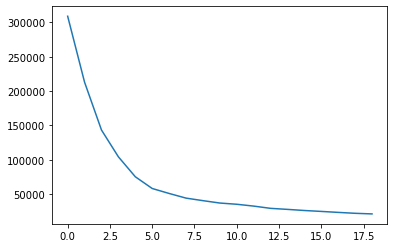

In [9]:
score=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    score.append(kmeans.inertia_)
plt.plot(score)

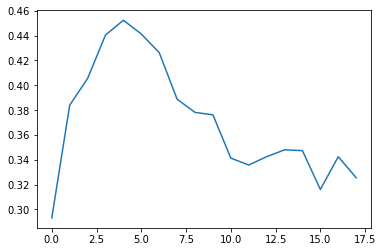

In [21]:
from sklearn.metrics import silhouette_score
s=[]
for i in range(2,20):
    kmean=KMeans(n_clusters=i)
    kmean.fit(x)
    s.append(silhouette_score(x,kmean.labels_))
plt.plot(s)

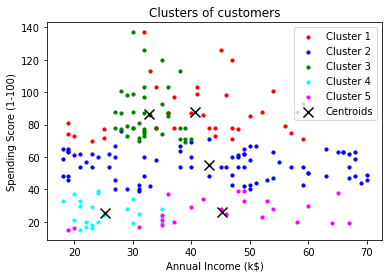

In [8]:
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(x[ypred == 2, 0], x[ypred == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(x[ypred == 3, 0], x[ypred == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[ypred == 4, 0], x[ypred == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids',marker='x')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [9]:
kmeans.cluster_centers_[:, 0]

array([40.66666667, 42.9375    , 32.69230769, 25.27272727, 45.2173913 ])

In [10]:
x[ypred]

array([[31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [23, 16, 77],
       [31, 17, 40],
       [21, 15, 81],
       [31, 17, 40],
       [23, 16, 77],
       [21, 15, 81],
       [21, 1

In [11]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,kmeans.labels_)
score

0.44504314844253573

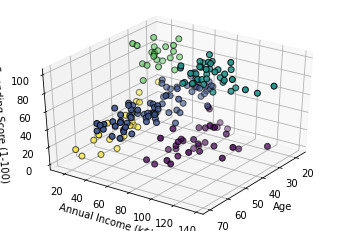

In [12]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
  
fig = plt.figure() 

# syntax for 3-D projection 
ax = plt.axes(projection ='3d')
ax.view_init(35, 35)
ax.scatter3D(xs=df['Age'],ys=df['Annual Income (k$)'],zs= df['Spending Score (1-100)'],c=kmeans.labels_,s=35, edgecolor='k')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

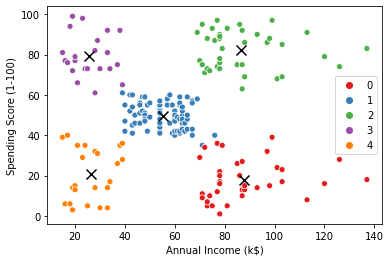

In [13]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',hue=kmeans.labels_,data=df, legend='full',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'black',marker="x")

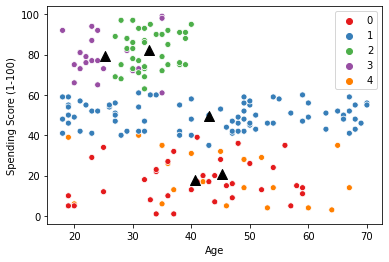

In [14]:
sns.scatterplot('Age', 'Spending Score (1-100)',hue=kmeans.labels_,data=df, legend='full',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 100, c = 'black',marker='^')

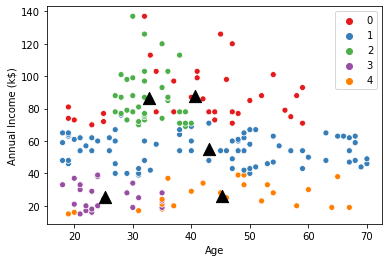

In [15]:
sns.scatterplot('Age', 'Annual Income (k$)',hue=kmeans.labels_,data=df, legend='full',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black',marker='^')

In [16]:
kmeans.cluster_centers_

array([[40.66666667, 87.75      , 17.58333333],
       [42.9375    , 55.0875    , 49.7125    ],
       [32.69230769, 86.53846154, 82.12820513],
       [25.27272727, 25.72727273, 79.36363636],
       [45.2173913 , 26.30434783, 20.91304348]])

In [17]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [18]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,kmeans.labels_))

0.44504314844253573


In [19]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=12.5,min_samples=4)
dbscan.fit_predict(x)

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

In [20]:
dbscan.core_sample_indices_

array([  1,   3,   4,   5,   9,  13,  15,  16,  17,  20,  21,  22,  23,
        24,  25,  26,  28,  29,  30,  31,  32,  33,  34,  35,  37,  39,
        41,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 141, 143, 144, 145, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 157, 159, 161, 162, 163, 164, 165, 166,
       167, 168, 170, 171, 173, 174, 175, 177, 179, 180, 181, 182, 183,
       185, 189], dtype=int64)

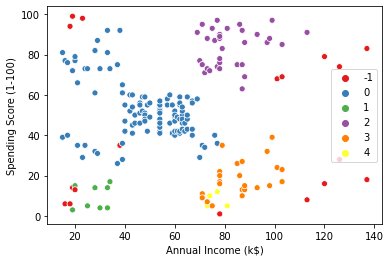

In [21]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',hue=dbscan.labels_,data=df, legend='full',palette='Set1')


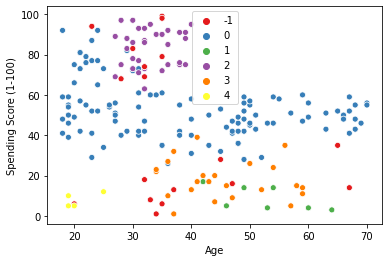

In [22]:
sns.scatterplot('Age', 'Spending Score (1-100)',hue=dbscan.labels_,data=df, legend='brief',palette='Set1')


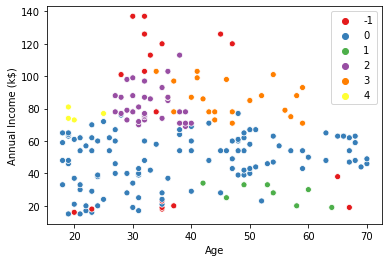

In [23]:
sns.scatterplot('Age','Annual Income (k$)',hue=dbscan.labels_,data=df, legend='full',palette='Set1')


In [24]:
print(silhouette_score(x,dbscan.labels_))

0.2555628510249617


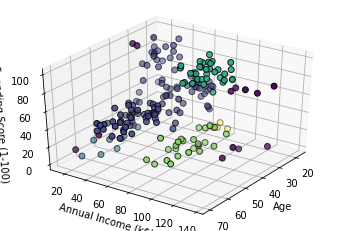

In [25]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
  
fig = plt.figure() 

# syntax for 3-D projection 
ax = plt.axes(projection ='3d')
ax.view_init(35, 35)
ax.scatter3D(xs=df['Age'],ys=df['Annual Income (k$)'],zs= df['Spending Score (1-100)'],c=dbscan.labels_,s=35, edgecolor='k')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

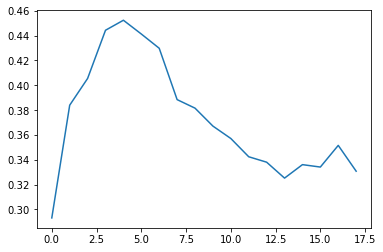

In [61]:
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2,20):
    km=KMeans(n_clusters=i,n_init=1 )
    km.fit_predict(x)
    ss.append(silhouette_score(x,km.labels_))
plt.plot(ss)